# Desafio LATAM

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de Chile (SCL). Para eso se entrega un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que
aterrizó o despegó de SCL.

## Análisis del dataset

El dataset se encuentra en el fichero *dataset_SCL.csv*, y a continuación se realiza una primera vista del mismo con las primeras cinco observaciones.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('dataset_SCL.csv')
data.head()


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


El dataset contiene 18 variables con 68206 observaciones, y el tipo de datos de las variables se observa en la salida de los códigos siguentes.

In [2]:
data.shape

(68206, 18)

In [3]:
data.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

## Punto 1 
¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

Vamos a revisar si existen valores NaN, luego a convertir a datetime las fechas, y a entero el numero de vuelo. El resto de las variables se puede quedar con el tipo que le asigna pandas. 

In [4]:

data[data.isna().any(axis=1)]


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


Se observa que el número de vuelo en operación falta, por tanto le agrego el mismo que fue programado.  

In [5]:
data.loc[6068,'Vlo-O']="200"
data.iloc[[6068]]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,200,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


Vamos a convertir las variables Vlo-I y Vlo-O a entero, para ello observo si existe algún error que me impida realizar la conversión.

In [6]:
df = data[data ['Vlo-O'].str.contains('[A-Za-z]', na=False)]  
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
13906,2017-03-30 10:30:00,71,SCEL,SCIE,SKU,2017-03-30 10:50:00,71R,SCEL,SCIE,SKU,30,3,2017,Jueves,N,Sky Airline,Santiago,Concepcion
13907,2017-03-22 11:00:00,1071,SCEL,SCIE,SKU,2017-03-22 11:00:00,71R,SCEL,SCIE,SKU,22,3,2017,Miercoles,N,Sky Airline,Santiago,Concepcion
17055,2017-03-22 10:00:00,201,SCEL,SCIE,LXP,2017-03-22 11:50:00,201R,SCEL,SCIE,LXP,22,3,2017,Miercoles,N,Grupo LATAM,Santiago,Concepcion
19207,2017-04-25 09:00:00,71,SCEL,SCIE,SKU,2017-04-25 09:29:00,71R,SCEL,SCIE,SKU,25,4,2017,Martes,N,Sky Airline,Santiago,Concepcion
22167,2017-04-06 21:10:00,43,SCEL,SCIE,LAW,2017-04-06 21:24:00,43R,SCEL,SCIE,JMR,6,4,2017,Jueves,N,Latin American Wings,Santiago,Concepcion


In [7]:
data['Vlo-I']=data['Vlo-I'].replace('[A-Za-z]', '', regex=True)
data['Vlo-O']=data['Vlo-O'].replace('[A-Za-z]', '', regex=True)

data['Vlo-O']=data['Vlo-O'].astype(float) # Tiene números con valores decimales
data['Vlo-O']=data['Vlo-O'].astype(int)
data['Vlo-I']=data['Vlo-I'].astype(int)

#Convierto las fechas a datatime
data['Fecha-I']=pd.to_datetime(data['Fecha-I'])
data['Fecha-O']=pd.to_datetime(data['Fecha-O'])

#data['DIANOM']=data['DIANOM'].astype('category')
#data['SIGLADES']=data['SIGLADES'].astype('category')

print(data.dtypes)

Fecha-I      datetime64[ns]
Vlo-I                 int32
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                 int32
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object


Como los datos son del aeropuerto de Santiago de Chile, compruebo si las columnas **Ori-I**, **Ori-O** y **SIGLAORI** se refieren a la misma información. Reviso además si puedo realizar alguna conclusion parcial de los datos revisando los valores únicos por columnas.

In [8]:
data.nunique()

Fecha-I      53252
Vlo-I          581
Ori-I            1
Des-I           64
Emp-I           30
Fecha-O      62774
Vlo-O          595
Ori-O            1
Des-O           63
Emp-O           32
DIA             31
MES             12
AÑO              2
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLAORI         1
SIGLADES        62
dtype: int64

Lo primero que se observa es que las variables **Ori-I**, **Ori-O** y **SIGLAORI** contienen un único valor que corresponde a la ciudad de Santiago, por tanto manejan la misma información y estas columnas van a ser eliminadas. 

In [9]:
data.drop(['Ori-I','Ori-O', 'SIGLAORI'], axis=1, inplace=True)

 Reviso además si existe algún destino a Santiago, de no ser así estaríamos en presencia de operaciones de arribo. 


In [10]:
data[(data['Des-O']=="SCEL")|(data['Des-I']=="SCEL")|(data['SIGLADES']=="Santiago")]

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES


No existen filas con destino Santiago, por lo que se puede concluir que los datos solamente corresponden a operaciones de despegue.

En los valores únicos se observa además que existen más vuelos en operaciones (Vlo-O: 866) que vuelos programados(Vlo-I:750) y menos destinos de operación(Des-O:63) que destinos programados (Des-I:64), lo que hace pensar que estos datos de los vuelos sufren cambios al operar. 

In [11]:
df=pd.DataFrame(data={'Des-I vs Des-O': [len(data[['Des-I', 'Des-O']][data['Des-I'] != data['Des-O']])],
                      '%Dest':[(len(data[['Des-I', 'Des-O']][data['Des-I'] != data['Des-O']])/data.shape[0])*100],
                      'Vlo-I vs Vlo-O':[len(data[['Vlo-I', 'Vlo-O']][data['Vlo-I'] != data['Vlo-O']])],
                     '%Vlo':[(len(data[['Vlo-I', 'Vlo-O']][data['Vlo-I'] != data['Vlo-O']])/data.shape[0])*100],} )
print(df)

   Des-I vs Des-O     %Dest  Vlo-I vs Vlo-O      %Vlo
0              28  0.041052             102  0.149547


En este caso, en todo el dataset 28 vuelos sufren cambios en el destino, y 1850 en el número de vuelo que finalmente opera. Estos valores pueden o no influir en los atrasos, pero solo representan el 0.04% y 2.71% respectivamente del dataset.    


A continuación genero un reporte mediante la funcion profile_report de pandas, para verificar las distribuciones de las variables y su correlación.

In [12]:
profile = ProfileReport(data, title="My Data Profile Report" )
profile.to_widgets()


A partir del reporte generado se puede observar que las variables referidas a las fechas, tienen una distribución bastante uniforme, lo que da entender que durante todas las fechas, son similares la cantidad de vuelos que operan. Por otro lado según la frecuencia de  DIANOM y MES los dias con mayor cantidad de vuelos son los lunes, jueves y viernes. Los meses que mas vuelos operan corresponden a los períodos de vacaciones en Julio, Diciembre y Enero. Estas distribuciones tienen sentido y se corresponden con el fenómeno.

Otras informaciones relevantes se observan en los diagramas de correlación. En el diagrama de Phik se observa una alta correlacion entre las variables Des-I, Des-O, SIGLADES,Emp-I, Emp-O, OPERA y TIPOVUELO. En nuestro caso por el tipo de algoritmo a utilizar para crear mi modelo solo tendría en cuenta las variables SIGLADES y OPERA. Las variables  DIANOM, DIA, MES y AÑO tienen una baja correlación. 

## Punto2 
Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv 
- **temporada_alta** : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
- **dif_min** : diferencia en minutos entre Fecha-O y Fecha-I .
- **atraso_15** : 1 si dif_min > 15, 0 si no.
- **periodo_dia** : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .

In [13]:
import datetime

def temporada_alta(row):
    anno = row['Fecha-I'].year
    intervalo_a_ini = datetime.datetime(anno,12,15)
    intervalo_a_fin = datetime.datetime(anno,3,3)
    intervalo_b_ini = datetime.datetime(anno,7,15)
    intervalo_b_fin = datetime.datetime(anno,7,31)
    intervalo_c_ini = datetime.datetime(anno,9,11)
    intervalo_c_fin = datetime.datetime(anno,9,30)
    if ((intervalo_a_ini <= row['Fecha-I'] <= intervalo_a_fin) or 
    (intervalo_b_ini <= row['Fecha-I'] <= intervalo_b_fin)
    or (intervalo_c_ini <= row['Fecha-I'] <= intervalo_c_fin)) :
        return 1
    return 0

def dif_min(row):
    diff = (row['Fecha-O'] - row['Fecha-I']).total_seconds()/60
    return diff

def atraso_15(row):
    if (row['dif_min'] > 15):
        return 1
    return 0

def periodo_dia(row):
    intervalo_a_ini = datetime.time(5,0)
    intervalo_a_fin = datetime.time(11,59)
    intervalo_b_ini = datetime.time(12,0)
    intervalo_b_fin = datetime.time(18,59)
    if (intervalo_a_ini <= row['Fecha-I'].time() <= intervalo_a_fin):
        return "mañana"
    elif (intervalo_b_ini <= row['Fecha-I'].time() <= intervalo_b_fin):
        return "tarde"
    return "noche"
        
data['temporada_alta'] = data.apply(temporada_alta, axis=1)
data['dif_min'] = data.apply(dif_min, axis=1)
data['atraso_15'] = data.apply(atraso_15, axis=1)
data['periodo_dia'] = data.apply(periodo_dia, axis=1)
df = data[['temporada_alta','dif_min','atraso_15','periodo_dia' ]]
df.to_csv("synthetic_features.csv")


## Punto 3
¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de
vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

Para ello se implementa una función *tasa_dataframe* que generaliza el calculo de las tasas. Luego se obtienen los gráficos de barra por cada categoría de las variables de interés, en función del porcentage de atrasos.


In [14]:
def tasa_dataframe(columna):
    dest_df = data.groupby(columna)
    atrasos_summary = []
    
    for (dest,grupo) in dest_df:
        row = {}
        conteo_s = grupo['atraso_15'].value_counts()
        row[columna] = dest
        row['atraso'] = 0  
        row['en_tiempo'] = 0
        
        if 0 in conteo_s.index:
            row['en_tiempo'] = conteo_s[0]
            
        if 1 in conteo_s.index:
            row['atraso'] = conteo_s[1]
            
        atrasos_summary.append(row)
    
    tasa_df = pd.DataFrame(atrasos_summary)
    return tasa_df

### Tasa de atraso por destinos y aerolineas

En ambas gráficas se observa una alta variación en las tasas de atrasos en diferentes destinos y aerolineas. Por tanto estas variables pueden ser útiles para predecir atrasos. 

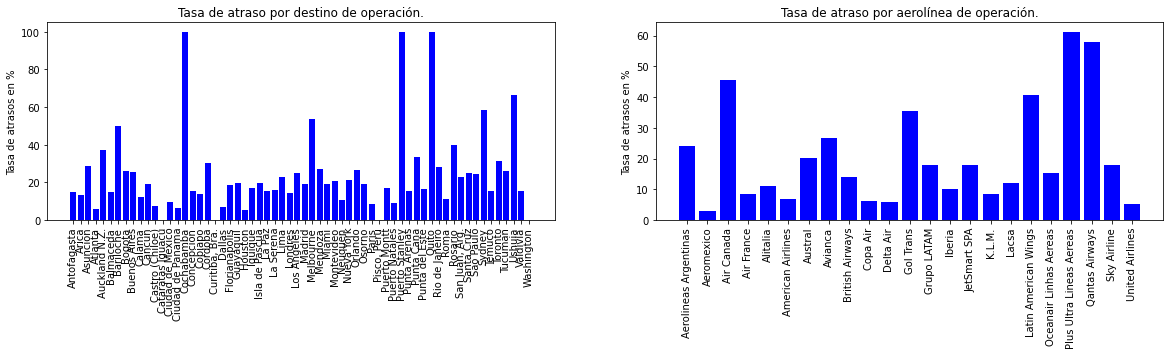

In [15]:
tasa_df = tasa_dataframe('SIGLADES')

x = tasa_df['SIGLADES']
y1 = tasa_df['atraso']
y2 = tasa_df['en_tiempo']

tasa=y1/(y1+y2)*100

tasa_df1 = tasa_dataframe('OPERA')
z = tasa_df1['OPERA']
y3 = tasa_df1['atraso']
y4 = tasa_df1['en_tiempo']
tasa2=y3/(y3+y4)*100

# plot 
plt.figure(figsize=(20,8))
plt.subplot(221)
plt.xticks(rotation=90)
plt.bar(x, tasa,  color='b')
plt.ylabel('Tasa de atrasos en %')
plt.title('Tasa de atraso por destino de operación.')

plt.subplot(222)
plt.xticks(rotation=90)
plt.bar(z, tasa2,  color='b')
plt.ylabel('Tasa de atrasos en %')
plt.title('Tasa de atraso por aerolínea de operación.')
plt.show()

### Tasa de atraso por mes del año y día de la semana

En el gráfico *tasa de atraso por mes* se observa que los meses que mayores atrasos presentan son los meses de vacaciones Julio y Diciembre, el resto de los meses se mantiene variable. A simple vista, se puede decir que la variable MES no presenta una alta correlación con la tasa de atrasos, por lo que puede ser relevante para la predicción. 

El gráfico *tasa de atraso por día de la semana* presenta una menor variabilidad, la diferencia entre los días con mayores atrasos no es tan relevante respecto al resto de los días. Esta variable tendría un menor interés en la predición. 

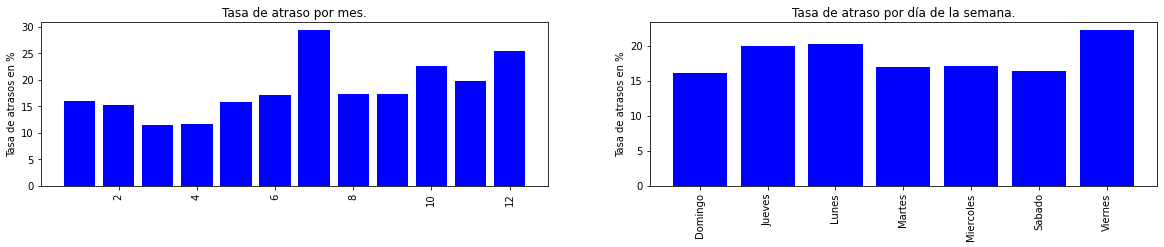

In [16]:
tasa_df = tasa_dataframe('MES')
x = tasa_df['MES']
y1 = tasa_df['atraso']
y2 = tasa_df['en_tiempo']
tasa=y1/(y1+y2)*100

tasa_df1 = tasa_dataframe('DIANOM')
z = tasa_df1['DIANOM']
y3 = tasa_df1['atraso']
y4 = tasa_df1['en_tiempo']
tasa2=y3/(y3+y4)*100

# plot 
plt.figure(figsize=(20, 3))
plt.subplot(121)
plt.xticks(rotation=90)
plt.bar(x, tasa,  color='b')
plt.ylabel('Tasa de atrasos en %')
plt.title('Tasa de atraso por mes.')

plt.subplot(122)
plt.xticks(rotation=90)
plt.bar(z, tasa2,  color='b')
plt.ylabel('Tasa de atrasos en %')
plt.title('Tasa de atraso por día de la semana.')
plt.show()

### Tasa de atraso por temporada y tipo de vuelo

En ambos gráficos se observa una leve variación en las tasas de atraso. Estas dos variables **temporada_alta** y **TIPOVUELO** pueden no ser de interés para la predicción, pero no se pueden descartar a priori. 

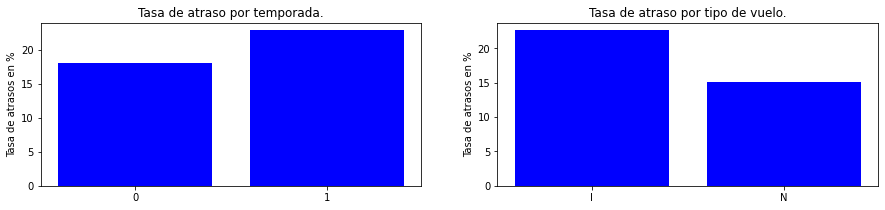

In [17]:
tasa_df = tasa_dataframe('temporada_alta')

x = tasa_df['temporada_alta'].astype(str)
y1 = tasa_df['atraso']
y2 = tasa_df['en_tiempo']
tasa=y1/(y1+y2)*100

tasa_df1 = tasa_dataframe('TIPOVUELO')
z = tasa_df1['TIPOVUELO']
y3 = tasa_df1['atraso']
y4 = tasa_df1['en_tiempo']
tasa1=y3/(y3+y4)*100

# plots
plt.figure(figsize=(15, 3))
plt.subplot(121)
plt.bar(x, tasa,  color='b')
plt.ylabel('Tasa de atrasos en %')
plt.title('Tasa de atraso por temporada.')

plt.subplot(122)
plt.bar(z, tasa1,  color='b')
plt.ylabel('Tasa de atrasos en %')
plt.title('Tasa de atraso por tipo de vuelo.')
plt.show()


## Punto 4

Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un
vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

Primero reviso la variable objetivo atraso_15, me doy cuenta que hay un desbalance en las etiquetas de clase, ya que son  68206 filas y solamente 12614 son de la clase minoritaria 1, que representa el 18.49 de las muestras. 

Según las variables que tengo, y los resultados del análisis descriptivo solamente me quedo con las variables 'Vlo-O','periodo_dia','DIANOM','MES'y 'SIGLADES'. Además agrego una nueva variable llamada *flujo* que guarda la cantidad de vuelos por fecha.

In [18]:
# Se construye a variable flujo 

def getDate(row):
    return row['Fecha-O'].date()

data['fecha'] = data.apply(getDate, axis=1)
flujo_df = data.groupby('fecha').size().reset_index(name='flujo')
   
new_data = pd.merge(data, flujo_df, how='inner', left_on=['fecha'], right_on=['fecha'])
new_data.reindex(data.index)

data = new_data.copy()

#Selecciono las variables predictoras
df=data[['flujo','Vlo-O','periodo_dia','DIANOM','MES','SIGLADES','atraso_15']]

df['MES']=df['MES'].astype(object)
df['Vlo-O']=df['Vlo-O'].astype(object)
df['periodo_dia']=df['periodo_dia'].astype(object)

Se preparan los datos y se divide el conjunto en 60% de entrenamiento, 20% de validación  y 20% para prueba. Además se transforman los datos categóricos o nominales mediante el método OneHotEncoder. 

In [19]:
#### Preparando el dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X = df.iloc[:,:-1]
y = df['atraso_15']

X_trainfull, X_test, y_trainfull, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainfull, y_trainfull, test_size=0.20, random_state=42, stratify=y_trainfull)

object_cols = [col for col in X.columns if X[col].dtype == "object"]

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_val = pd.DataFrame(OH_encoder.transform(X_val[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_val.index = X_val.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_val = X_val.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_val = pd.concat([num_X_val, OH_cols_val], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)



Como estamos en presencia de un problema de predicción de la probabilidad de que ocurra un evento, se construye un modelo de regresión logística y teniendo en cuenta hay un ligero desbalance entre las clases aplico pesos a cada una en función de lograr una mejor performance. 

In [20]:
##### Defino el modelo

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter=10000,random_state=42,class_weight={0:1, 1:4.0} )
reg.fit(OH_X_train, y_train)
y_pred = reg.predict(OH_X_val)

## Punto 5

Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular? 

Se utilizan las métricas curva ROC, accuracy, Precision, Recall y una matriz de confusión para visualizar la tasa de aciertos. Me fijo principalmente en la sensibilidad(recall) por que interesa conocer la capacidad del modelo para predecir  los casos de la clase positiva(1)

In [21]:
### 4. Model Evaluation  ###
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print("Entrenamiento:")
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred) }')

y_pred_proba1 = reg.predict_proba(OH_X_val)[:,1]
auc = metrics.roc_auc_score(y_val, y_pred_proba1)
print("AUC train:", round(auc,2))

print(metrics.classification_report(y_val, y_pred))


print("Prueba:")

y_pred_proba = reg.predict_proba(OH_X_test)[:,1]
y_pred_test = reg.predict(OH_X_test)
                             
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test)}')
auc = metrics.roc_auc_score(y_test, y_pred_proba)

print("AUC test:", round(auc,2))
                             
print(metrics.classification_report(y_test, y_pred_test))



Entrenamiento:
Confusion Matrix: 
[[6383 2512]
 [ 851 1167]]
AUC train: 0.71
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      8895
           1       0.32      0.58      0.41      2018

    accuracy                           0.69     10913
   macro avg       0.60      0.65      0.60     10913
weighted avg       0.78      0.69      0.72     10913

Prueba:
Confusion Matrix: 
[[8012 3107]
 [1084 1439]]
AUC test: 0.7
              precision    recall  f1-score   support

           0       0.88      0.72      0.79     11119
           1       0.32      0.57      0.41      2523

    accuracy                           0.69     13642
   macro avg       0.60      0.65      0.60     13642
weighted avg       0.78      0.69      0.72     13642



Como se observa anteriormente la exactitud(accuracy) del modelo en el entrenamiento y la prueba es de 0.69, lo cual a pesar de ser un valor bajo demuestra que no existe sobreentrenamiento(overffiting). Sin embargo para el tipo de problema que estamos trabajando es conveniente enfocarse en la métrica curva ROC, que muestra el rendimiento del modelo en todos los umbrales de clasificación. Y esta métrica tiene un valor de 0.71 en el entrenamiento y 0.7 en la prueba. 

La precision del modelo para la clase negativa(0) es de 0.88 y 0.32 para la clase positiva(1), esto implica que la calidad de la predicción para la clase mayoritaria es mejor que para la clase minoritaria, y el recll se coporta similar aunque un poco mejor en la clase minaritaria respecto a la precision. Podemos confirmar lo anterior revisando la matriz de confusión donde solo fueron correctamente clasificados 1439 items de la clase positiva. 

De aquí se puede decir que el  modelo solo puede predecir con las variables seleccionadas el 0.57% de los casos como atrasos. Lo cual se puede mejorar para nuestro problema. 

¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?

Luego ajustar el modelo con variables variables, las que mas influyeron son Vlo-O, MES, periodo_dia y flujo. Para mejorar la performance se puede hacer ingeniería de features para encontrar nuevas variables a partir de las existentes  o combinarlas por ejemplo , y agregar otras externas como el clima en aeropuerto, fallas tecnicas o ciclo de mantenimiento del avion. 

